In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
import safeopt
import heapq
#import sns
import seaborn as sns

In [2]:
class Agent:
    def __init__(self,id,bounds,safe_point):

        self.bounds = [bounds]
        self.id = id
        self.safepoint = safe_point
        self.global_rewards = np.array([])
        self.max_belief = np.array([[]])

        self.x0 = np.asarray([[self.safepoint]])
        self.y0 = np.asarray([[global_reward(self.safepoint,self.safepoint,self.safepoint)]])
        print(self.y0)

        self.kernel = GPy.kern.RBF(1)
        self.gp = GPy.models.GPRegression(self.x0,self.y0, self.kernel, noise_var=0)
        self.parameter_set = safeopt.linearly_spaced_combinations(self.bounds, 100)
        self.opt = safeopt.SafeOpt(self.gp, self.parameter_set, -np.inf,beta=10,threshold=0.1)

    def optimize(self):
        x_next = self.opt.optimize()
        return x_next
    
    def update(self,x_next,y_meas):
        self.max_belief = np.append(self.max_belief,self.opt.get_maximum()[1])
    
        self.opt.add_new_data_point(x_next,y_meas)

    def plot_opt(self):
        self.opt.plot(1000)


def run_experiments(a1,a2,a3,iterations):

    for i in range(iterations):
        x1 = a1.optimize()
        x2 = a2.optimize()
        x3 = a3.optimize()

        y = global_reward(x1,x2,x3)

        a1.update(x1,y)
        a2.update(x2,y)
        a3.update(x3,y)

    return  a1.gp.X, a2.gp.X, a3.gp.X

def global_reward(x1,x2,x3):
    y = np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)
    return y

[[0.90111658]]
[[0.95014271]]
[[1.18986952]]
None
Matrix:
 [[ 0.1         0.05       -0.2       ]
 [-1.5        -1.5         1.5       ]
 [ 1.5         1.5        -1.5       ]
 [-0.71212121 -0.74242424  0.68181818]
 [ 0.89393939  0.86363636 -0.92424242]
 [ 0.53030303  0.46969697 -0.56060606]
 [ 0.98484848  0.95454545 -1.04545455]
 [ 1.07575758  1.07575758 -1.07575758]
 [-1.22727273 -1.22727273 -1.04545455]
 [ 1.01515152  0.98484848  0.37878788]
 [-0.34848485 -0.37878788  1.25757576]
 [ 0.8030303   1.28787879 -0.8030303 ]
 [ 1.1969697   0.83333333 -1.22727273]
 [ 1.28787879  0.77272727 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.25757576  0.74242424 -1.31818182]
 [ 1.

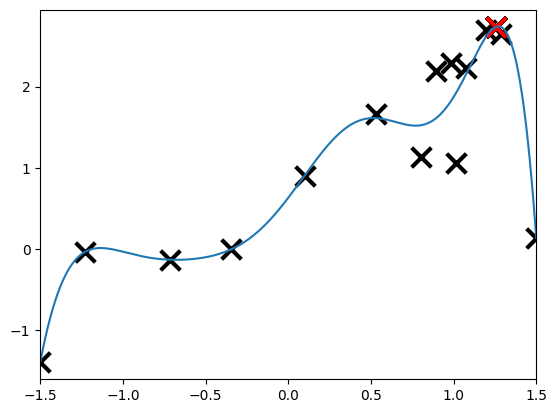

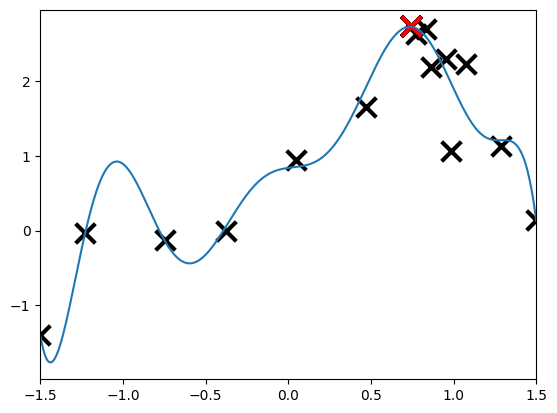

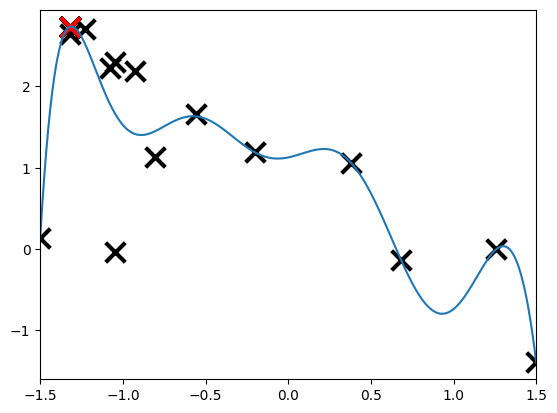

In [3]:
n=150

latent_dim = 3

Agent1 = Agent(1,(-1.5,1.5),0.1)
Agent2 = Agent(2,(-1.5,1.5),0.05)
Agent3 = Agent(3,(-1.5,1.5),-0.2)


x1,x2,x3 = run_experiments(Agent1,Agent2,Agent3,n)

# Combine these vectors into a single matrix with n rows and 3 columns
matrix = np.column_stack((x1, x2, x3))

Agent1.plot_opt()
Agent2.plot_opt()
Agent3.plot_opt()

safe_set = Agent1.opt.compute_safe_set()
print(safe_set)

# Display the resulting matrix
print("Matrix:\n", matrix)

print("nubmer of rows:", matrix.shape[0])
print("number of columns:", matrix.shape[1])




In [4]:
print("rewards:", Agent1.opt.get_maximum()[1])
print("rewards:", Agent2.opt.get_maximum()[1])
print("rewards:", Agent3.opt.get_maximum()[1])  


rewards: 2.733274227222529
rewards: 2.72934127915447
rewards: 2.7337512125485763


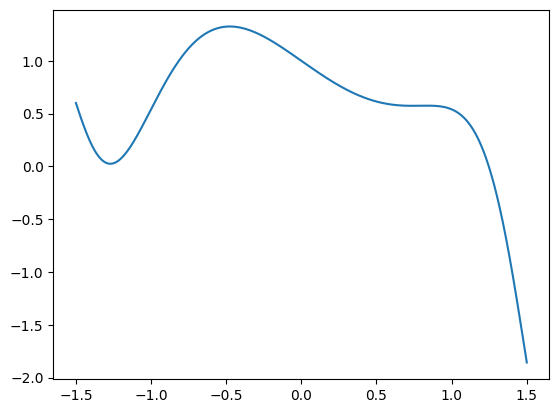

In [5]:
#plot the global functin 
x = np.linspace(-1.5,1.5,1000)
y = np.sin(x**3) + np.cos(x**2) - np.sin(x)
plt.plot(x,y)



{'scatter': [<matplotlib.collections.PathCollection at 0x78391c371460>],
 'imshow': <matplotlib.image.AxesImage at 0x78391dad55b0>}

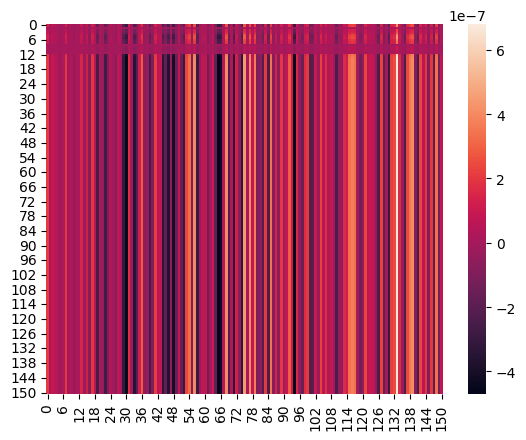

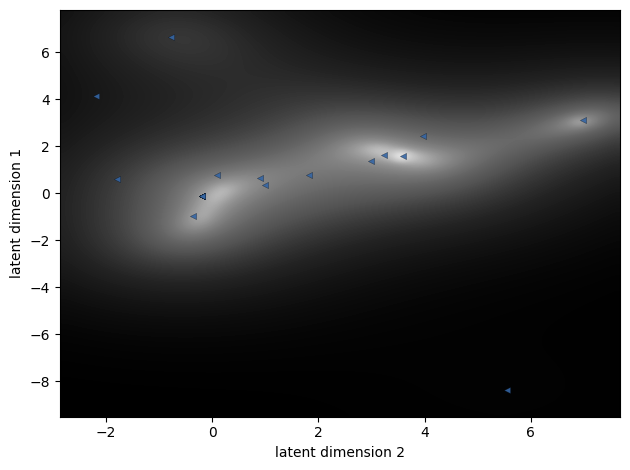

In [6]:


kernel = GPy.kern.RBF(latent_dim)


model_gplvm =GPy.models.GPLVM(matrix,latent_dim,kernel=kernel,init='PCA')
model_gplvm.optimize(max_iters=1000)

model_gplvm.posterior.mean
model_gplvm.posterior.covariance

sns.heatmap(model_gplvm.posterior.covariance)
model_gplvm.plot_latent()



{'dataplot': [<matplotlib.collections.PathCollection at 0x78391c3735f0>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x78391c212b10>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x78391d9839b0>,
  <matplotlib.collections.PolyCollection at 0x78391c365220>]}

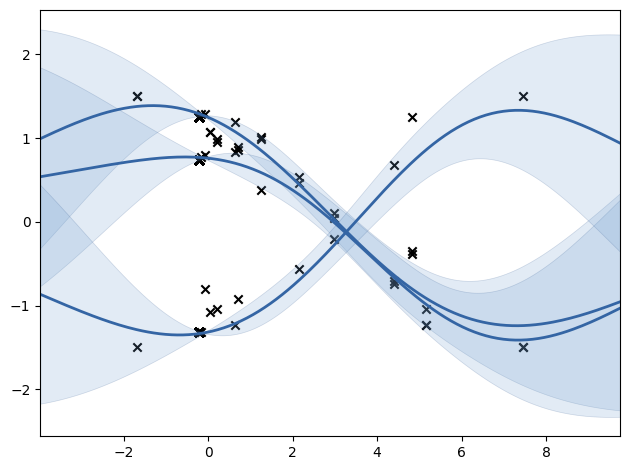

In [7]:
model_gplvm.plot(visible_dims=[0],legend=False)

In [8]:
print(model_gplvm.kern.K(model_gplvm.X,model_gplvm.X))


[[1.00727598 0.34577197 0.26396818 ... 0.63332099 0.6333211  0.63332069]
 [0.34577197 1.00727598 0.00921293 ... 0.0901331  0.09013312 0.09013308]
 [0.26396818 0.00921293 1.00727598 ... 0.36701727 0.36701727 0.36701676]
 ...
 [0.63332099 0.0901331  0.36701727 ... 1.00727598 1.00727598 1.00727598]
 [0.6333211  0.09013312 0.36701727 ... 1.00727598 1.00727598 1.00727598]
 [0.63332069 0.09013308 0.36701676 ... 1.00727598 1.00727598 1.00727598]]


In [9]:
Z = model_gplvm.X
z1=Z[:,0]
z2=Z[:,1]
z3=Z[:,2]
print(z1)

  index      |  GPLVM.latent_mean  |  constraints  |  priors
  [0 0]      |         2.98032543  |               |        
  [1 0]      |         7.46440438  |               |        
  [2 0]      |        -1.68705655  |               |        
  [3 0]      |         4.40618782  |               |        
  [4 0]      |         0.70428722  |               |        
  [5 0]      |         2.15852713  |               |        
  [6 0]      |         0.21980735  |               |        
  [7 0]      |         0.03758791  |               |        
  [8 0]      |         5.16865201  |               |        
  [9 0]      |         1.25846348  |               |        
  [10  0]    |         4.82945082  |               |        
  [11  0]    |        -0.06850145  |               |        
  [12  0]    |         0.62577826  |               |        
  [13  0]    |        -0.16231818  |               |        
  [14  0]    |        -0.20390903  |               |        
  [15  0]    |        -0

Text(0.5, 1.0, 'Agent 3 $-sin(x)$')

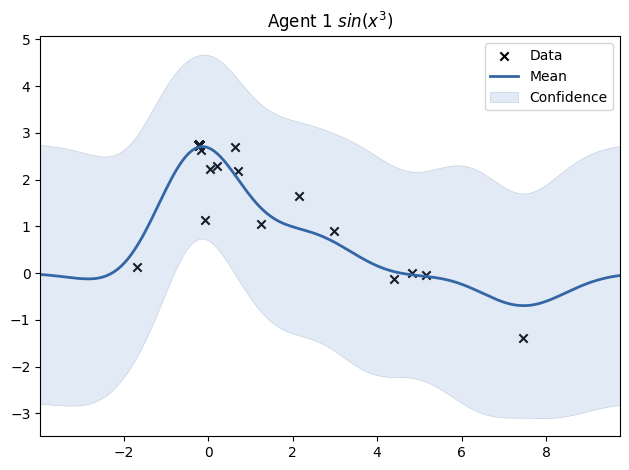

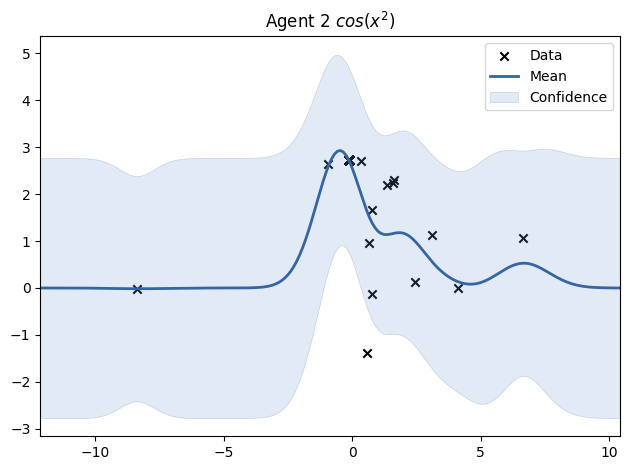

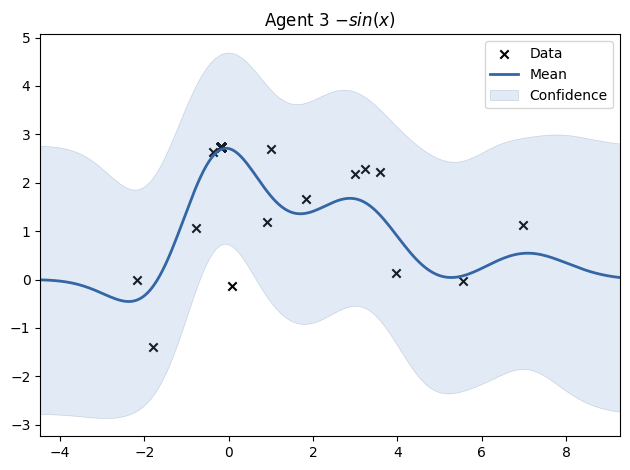

In [10]:
model1 = GPy.models.GPRegression(z1.reshape(-1,1), Agent1.gp.Y.reshape(-1,1), GPy.kern.RBF(1))
# model1.optimize()
model1.plot()
plt.title('Agent 1 $sin(x^3)$')
model2 = GPy.models.GPRegression(z2.reshape(-1,1), Agent2.gp.Y.reshape(-1,1), GPy.kern.RBF(1))
# model2.optimize()
model2.plot()
plt.title('Agent 2 $cos(x^2)$')
model3 = GPy.models.GPRegression(z3.reshape(-1,1), Agent3.gp.Y.reshape(-1,1), GPy.kern.RBF(1))
# model3.optimize()
model3.plot()
plt.title('Agent 3 $-sin(x)$')

<Axes: >

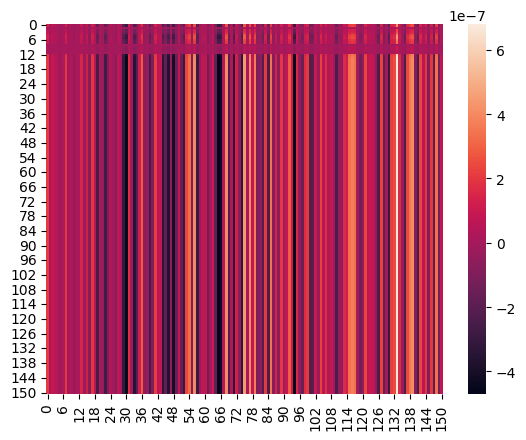

In [11]:
sns.heatmap(model_gplvm.posterior.covariance)